# 7CCSMQMF Python Coding Coursework                         
K23023533 Jhao-Wei Chen
<h2>Instructions</h2> 

***

This is a coursework on the use of the Monte Carlo scheme to price Asian options, to be
completed using a Jupyter Notebook. It will test your understanding of the lecture on Monte Carlo and
Exotics. You may use the code given in 7CCSMSCF to simulate the underlying stock.
<h2>Task</h2>

***
Use the expected value of the discounted payoff under the risk-neutral density Q: 
V(S; t) = e<span class="superscript">r(T-t)</span>E<sub>Q</sub>Payoff(S<sub>T</sub>) 
for the appropriate form of payoff, to consider 
<b>Asian (fixed and floating strike) options</b> and  <b>Super share options </b>- you will need to research these options and their payoff.

Use the <b>Euler-Maruyama</b> scheme for initially simulating the underlying stock price. As an initial example
you may use the following set of sample data:

<p>
Today's stock price S<sub>0</sub> = 100 <br>
Strike E = 100<br>
Time to expiry ( T - t ) = 1 year<br>
volatility &sigma; = 20%<br>
constant risk-free interest rate r = 5%
</p>
<h2>Introduction</h2>

***
<h3>Monte Carlo Scheme:</h3>

1. Set parameters as the given sample data, where time steps are discrete. 
<br>

2. Use statistical measure to decide the number of simulation. 
<br>

3. Use Euler-Maruyama Scheme, estimating the stock price paths by Geometric Brownian Motion as the stochastic term, which is the formula below:


&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;S<sub>t+dt</sub> = S<sub>t</sub> + &mu; &times; S<sub>t</sub> &times; dt + &sigma; &times; S<sub>t</sub> &times; &radic;dt &times; Z<sub>t</sub>  , where Z<sub>t</sub> is a random variable from standard normal distribution.


<h3>Pricing the list of Various Options:</h3>

<b>Asian Fixed-Strike Option:</b> It is an exotic option which payoff is the spread of average stock price over the period and the fixed strike price or 0, as shown in the following formula:

Payoff = max( E[S<sub>i</sub>] - E, 0 )

<b>Asian Floating-Strike Option:</b> It is an exotic option which strike price is the average stock price over the period, and the payoff is the final stock price minus this average strike price or 0, as shown in the following formula:

Payoff = max( S<sub>T</sub> - E[S<sub>i</sub>], 0 )

<b>Super Share Option:</b> It is an exotic option which payoff is the final stock price divided by the lower bound if the final stock price is in a fixed price range, as shown in the following formula:

Payoff = <span style="font-family:serif;">{</span> S<sub>T</sub> / L, if L &le; S<sub>T</sub> &le; U; 0, otherwise }

<h3>Parameter Modification:</h3>

1. Strike Price for Asian Fixed-Strike Option: from 95 to 105
<br>

2. Price Range for Super Share Option: from (L,U)=(99,101) to (L,U)=(80,120)
<br>

3. Risk-Free Interest Rate: from 1% to 10%
<br>

4. Volatility: from 0.1 to 1
<br>

5. Time to Expiry: from 1 year to 5 year

<h2>Implementation</h2>

***
<h3>1. Monte Carlo Simulation</h3>

<b>Deciding Number of Paths</b>

Number of simulations:1000, Standard Error:0.03188578139964373
Number of simulations:2000, Standard Error:0.021765175495508524
Number of simulations:3000, Standard Error:0.01813968820147525
Number of simulations:4000, Standard Error:0.015882813865276124
Number of simulations:5000, Standard Error:0.014294050600751335
Number of simulations:6000, Standard Error:0.012893131377184284
Number of simulations:7000, Standard Error:0.011881300390795503
Number of simulations:8000, Standard Error:0.011262469334518957
Number of simulations:9000, Standard Error:0.01053979571227642
Number of simulations:10000, Standard Error:0.009861349658892357


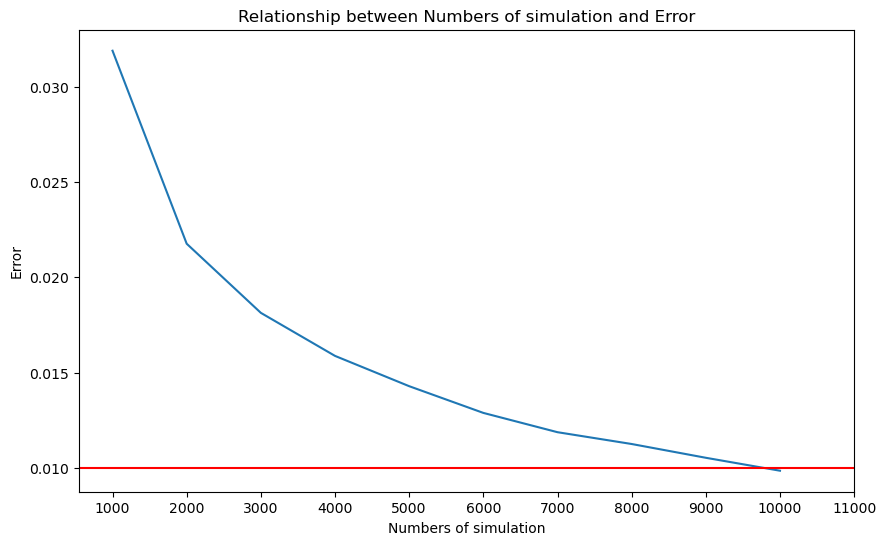

Final number of simulations:10000, because the error is 0.009861349658892357, which is smaller than 1%


In [13]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#set the starting point of the simulations numbers
simulation_num = 1000
#set the confidence level = 99%
threshold = 0.01
#set a random number larger than 0.01 to start the while loop
error = 1
#collect the error to plot a line graph
error_list = []
#find the numbers less than 0.01
while error > threshold:
    #create the sample 
    sample = np.random.normal(0, 1, simulation_num)
    #calculate the error
    error = np.std(sample) / np.sqrt(len(sample))
    #show every trial
    print("Number of simulations:"+str (simulation_num)+ ", Standard Error:"+str(error) )
    #increase the number of simulation by 1000
    simulation_num += 1000
    error_list.append(error)

#plot the result
#set the graph size 
plt.figure(figsize=(10,6))
#plot the trials
plt.plot(error_list)
#set the minimum acceptable error line
plt.axhline(y=0.01, color='r', linestyle='-')
#set the digits on the x-axis
plt.xticks([i for i in range(int(simulation_num/1000))], [ 1000* i for i in range(1,int(simulation_num/1000)+1)])
#set the name of x-axis
plt.xlabel('Numbers of simulation')
#set the name of y-axis
plt.ylabel('Error')
#set the title
plt.title('Relationship between Numbers of simulation and Error')
plt.show() 
    
# show the result
print("Final number of simulations:" + str(simulation_num - 1000) + ", because the error is " + str(error)+", which is smaller than 1%")

#this is the most efficient number which error is less than 1%
I = simulation_num - 1000

<b>Monte Carlo Simulation</b>

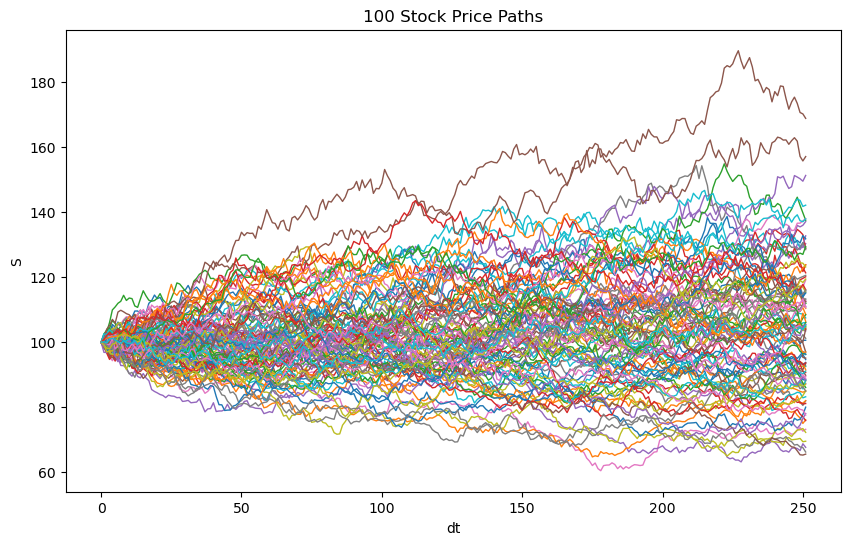

In [14]:
#set other parameters
S0 = 100 #today's stock price
T = 1.0 #time to expiry
E = 100 #strike price
r = 0.05 #risk-free interest rate
sigma = 0.2 #volatility
n = 252 #trading days in a year
dt = T / n #time step

#create a function which use Euler Method to simulate I paths with M time steps
def Euler_Maruyama(I):
    #create the array for storing the prices
    S = np.zeros((n, I))
    S[0] = S0
    # Simulating the stock price using the Euler method
    for t in range(1, n):
        Z = np.random.standard_normal(I)  # Random values from standard normal distribution
        S[t] = S[t - 1] + r * S[t - 1] * dt + sigma * S[t - 1] * np.sqrt(dt) * Z
    return(S)
#stimulate the paths
S = Euler_Maruyama(I)
#calculate the average price of I simulations
E_of_P = np.mean(S, axis=0)


#set the graph size
plt.figure(figsize=(10, 6))
#plot the first 50 paths as the schematic
for i in range(0,100):  
    plt.plot(S[:, i], lw=1)
#set the name of x-axis
plt.xlabel('dt')
#set the name of y-axis
plt.ylabel('S')
#set the title
plt.title('100 Stock Price Paths')
plt.show()


<h3>2. Asian Fixed-Strike Call Option</h3>

***
Compute its payoff and price of call and put with different strike prices.

Asian Call Price with Fixed Strike: 5.76789700802239
Asian Put Price with Fixed Strike: 3.2666701546199692


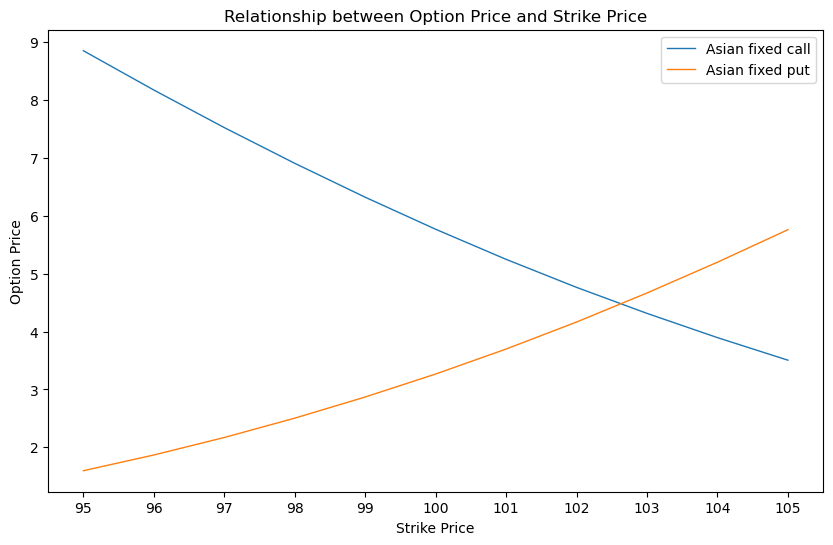

In [15]:
#calculate the payoff of Asian fixed call
asian_fixed_call_payoff = np.maximum(E_of_P - E, 0)
#calculate the Asian fixed call price
asian_fixed_call_P = np.exp(-r * T) * np.mean(asian_fixed_call_payoff)
#show the result
print("Asian Call Price with Fixed Strike: "+ str(asian_fixed_call_P))

#calculate the payoff of Asian fixed put
asian_fixed_put_payoff = np.maximum(E - E_of_P , 0)
#calculate the Asian fixed put price
asian_fixed_put_P = np.exp(-r * T) * np.mean(asian_fixed_put_payoff)
#show the result
print("Asian Put Price with Fixed Strike: "+ str(asian_fixed_put_P))

#create empty lists to collect the price with different strike price
asian_fixed_call_P_list=[]
asian_fixed_put_P_list=[]
#use for loop to change strike price
for i in range(95, 106):
    E = i
    #calculate the payoff of Asian fixed call
    asian_fixed_call_payoff = np.maximum(E_of_P - E, 0)
    #calculate the Asian fixed call price
    asian_fixed_call_P = np.exp(-r * T) * np.mean(asian_fixed_call_payoff)
    #collect the number into the prepared list
    asian_fixed_call_P_list.append(asian_fixed_call_P)
    
    #calculate the payoff of Asian fixed put
    asian_fixed_put_payoff = np.maximum(E - E_of_P , 0)
    #calculate the Asian fixed put price
    asian_fixed_put_P = np.exp(-r * T) * np.mean(asian_fixed_put_payoff)
    #collect the number into the prepared list
    asian_fixed_put_P_list.append(asian_fixed_put_P)
    
#set the graph size 
plt.figure(figsize=(10,6))

#plot the relationships between Asian fixed call prices and strike price
plt.plot(asian_fixed_call_P_list, lw=1, label='Asian fixed call')

#plot the relationships between Asian fixed put prices and strike price
plt.plot(asian_fixed_put_P_list, lw=1, label='Asian fixed put')

#set the digits on the x-axis
plt.xticks([i for i in range(0,11)], [i for i in range(95,106)])
#set the name of x-axis
plt.xlabel('Strike Price')
#set the name of y-axis
plt.ylabel('Option Price')
#set the title
plt.title('Relationship between Option Price and Strike Price')
# Adding a legend to the plot
plt.legend()
plt.show()    

#set strike price back
E = 100

<b>Mini-conclusion: &nbsp; As the strike price becomes larger, its call price decreases, while its put price increases.</b>

<h3>3. Asian Floating-Strike Call Option</h3>

***
Compute its payoff and price of call and put.

In [16]:
#calculate the payoff of Asian floating call
asian_floating_call_payoff = np.maximum(S[-1] - E_of_P, 0)
#calculate the Asian floating call price
asian_floating_call_P = np.exp(-r * T) * np.mean(asian_floating_call_payoff)
#show the result
print("Asian Call Price with Floating Strike: "+str(asian_floating_call_P))

#calculate the payoff of Asian floating put
asian_floating_put_payoff = np.maximum(E_of_P - S[-1] , 0)
#calculate the Asian floating put price
asian_floating_put_P = np.exp(-r * T) * np.mean(asian_floating_put_payoff)
#show the result
print("Asian Put Price with Floating Strike: "+str(asian_floating_put_P))

Asian Call Price with Floating Strike: 5.794168187736798
Asian Put Price with Floating Strike: 3.371113784219593


<h3>4. Super Share Option </h3>

***
Compute its payoff and price with different price ranges.

Super Share Option Price5: 0.19474840789266284
Super Share Option Price with wider range: 0.39925181305001717
Super Share Option Price with narrower range: 0.11480433405071212


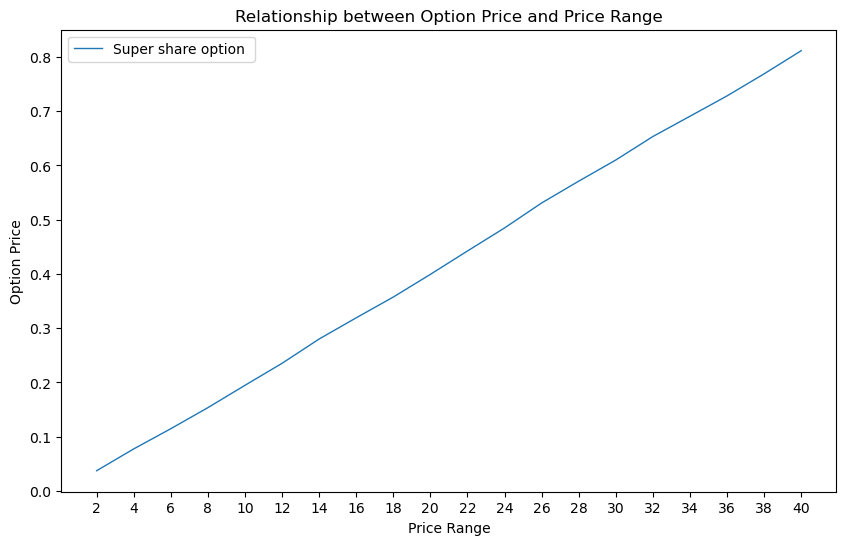

In [17]:
#set the price range (upper bound and lower bound) of Super share option 
L, U = 95, 105  
#calculate the payoff of Super share option 
super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
#calculate the Super share option price
super_share_option_P5 = np.exp(-r * T) * np.mean(super_share_payoff)
#show the result
print("Super Share Option Price5: "+str(super_share_option_P5))

#set a wider price range of Super share option 
L, U = 90, 110
#calculate the payoff of Super share option 
super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
#calculate the Super share option price
super_share_option_P10 = np.exp(-r * T) * np.mean(super_share_payoff)
#show the result
print("Super Share Option Price with wider range: "+str(super_share_option_P10))

#set a narrower price range of Super share option 
L, U = 97, 103  
#calculate the payoff of Super share option 
super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
#calculate the Super share option price
super_share_option_P3 = np.exp(-r * T) * np.mean(super_share_payoff)
#show the result
print("Super Share Option Price with narrower range: "+str(super_share_option_P3))

#create an empty list to collect the price with different price range
super_share_option_P_list=[]
#use for loop to change upper bound and lower bound 
for i in range(1, 21):
    U= 100+i
    L= 100-i
    #calculate the payoff of Super share option 
    super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
    #calculate the Super share option price
    super_share_option_P = np.exp(-r * T) * np.mean(super_share_payoff)
    #collect the number into the prepared list
    super_share_option_P_list.append(super_share_option_P)
    
#set the graph size 
plt.figure(figsize=(10,6))
#plot the relationships between Super share option price and price range
plt.plot(super_share_option_P_list, lw=1, label='Super share option ')
#set the digits on the x-axis
plt.xticks([i for i in range(0,20)], [i*2 for i in range(1,21)])
#set the name of x-axis
plt.xlabel('Price Range')
#set the name of y-axis
plt.ylabel('Option Price')
#set the title
plt.title('Relationship between Option Price and Price Range')
# Adding a legend to the plot
plt.legend()
plt.show()    

#set price range back
L, U = 95, 105


<b>Mini-conclusion: &nbsp; As the price range of Super share option becomes wider, its price increases.</b>

<h3>5. Comparision of options</h3>

***
Give a simple table of option prices.

In [18]:
#create a DataFrame show the table from lists
prices=[asian_fixed_call_P, asian_fixed_put_P, asian_floating_call_P, asian_floating_put_P, super_share_option_P5]
names=["Asian Call Price with Fixed Strike", "Asian Put Price with Fixed Strike", "Asian Call Price with Floating Strike", "Asian Put Price with Floating Strike", "Super Share Option Price"]
price_df = pd.DataFrame(prices, columns=["price"], index=names)
price_df=price_df.T
price_df

,Asian Call Price with Fixed Strike,Asian Put Price with Fixed Strike,Asian Call Price with Floating Strike,Asian Put Price with Floating Strike,Super Share Option Price
price,3.505558,5.760478,5.794168,3.371114,0.194748


<h3>6. Other Parameters Modification</h3>

***

<h4>(1) Risk-Free Interest Rate:</h4>

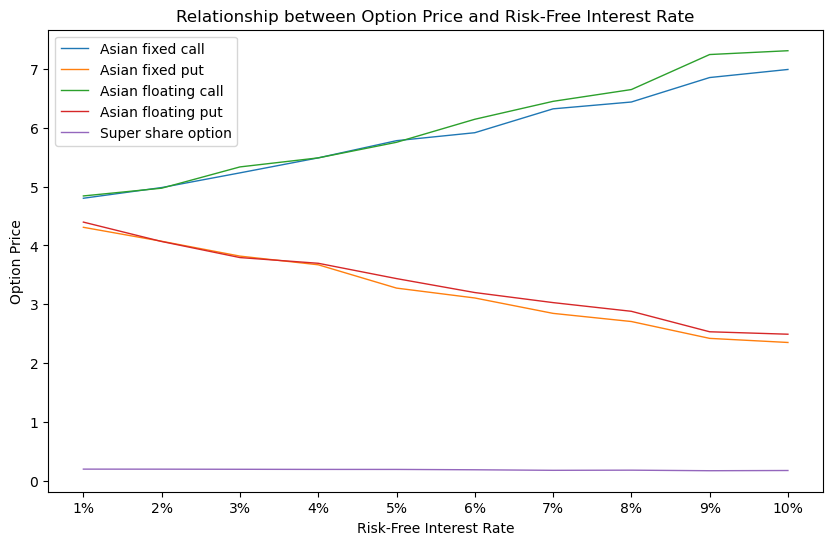

In [19]:
#create empty lists to collect the price under different risk-free interest rate
asian_fixed_call_P_List=[]
asian_fixed_put_P_List=[]
asian_floating_call_P_List=[]
asian_floating_put_P_List=[]
super_share_option_P5_List=[]

#use for loop to change risk-free interest rate
for i in range(1,11):
    r= i * 0.01
    #simulate I paths
    S = Euler_Maruyama(I)
    #calculate the average price of I simulations
    E_of_P = np.mean(S, axis=0)
    
    #calculate the payoff of Asian fixed call
    asian_fixed_call_payoff = np.maximum(E_of_P - E, 0)
    #calculate the Asian fixed call price
    asian_fixed_call_P = np.exp(-r * T) * np.mean(asian_fixed_call_payoff)
    #collect the number into the prepared list
    asian_fixed_call_P_List.append(asian_fixed_call_P)
    
    #calculate the payoff of Asian fixed put
    asian_fixed_put_payoff = np.maximum(E - E_of_P , 0)
    #calculate the Asian fixed put price
    asian_fixed_put_P = np.exp(-r * T) * np.mean(asian_fixed_put_payoff)
    #collect the number into the prepared list
    asian_fixed_put_P_List.append(asian_fixed_put_P)
    
    #calculate the payoff of Asian floating call
    asian_floating_call_payoff = np.maximum(S[-1] - E_of_P, 0)
    #calculate the Asian floating call price
    asian_floating_call_P = np.exp(-r * T) * np.mean(asian_floating_call_payoff)
    #collect the number into the prepared list
    asian_floating_call_P_List.append(asian_floating_call_P)

    #calculate the payoff of Asian floating put
    asian_floating_put_payoff = np.maximum(E_of_P - S[-1] , 0)
    #calculate the Asian floating put price
    asian_floating_put_P = np.exp(-r * T) * np.mean(asian_floating_put_payoff)
    #collect the number into the prepared list
    asian_floating_put_P_List.append(asian_floating_put_P)
    
    #calculate the payoff of Super share option 
    super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
    #calculate the Super share option price
    super_share_option_P5 = np.exp(-r * T) * np.mean(super_share_payoff)
    #collect the number into the prepared list
    super_share_option_P5_List.append(super_share_option_P5)
    
#set the graph size 
plt.figure(figsize=(10,6))

#plot the relationships between Asian fixed call prices and risk-free interest rate
plt.plot(asian_fixed_call_P_List, lw=1, label='Asian fixed call')

#plot the relationships between Asian fixed put prices and risk-free interest rate
plt.plot(asian_fixed_put_P_List, lw=1, label='Asian fixed put')

#plot the relationships between Asian floating call prices and risk-free interest rate
plt.plot(asian_floating_call_P_List, lw=1, label='Asian floating call')

#plot the relationships between Asian floating put prices and risk-free interest rate
plt.plot(asian_floating_put_P_List, lw=1, label='Asian floating put')

#plot the relationships between Super share option prices and risk-free interest rate
plt.plot(super_share_option_P5_List, lw=1, label='Super share option')

#set the digits on the x-axis
plt.xticks([i for i in range(10)], [str(i)+"%" for i in range(1,11)])
#set the name of x-axis
plt.xlabel('Risk-Free Interest Rate')
#set the name of y-axis
plt.ylabel('Option Price')
#set the title
plt.title('Relationship between Option Price and Risk-Free Interest Rate')
# Adding a legend to the plot
plt.legend()
plt.show()    

#change risk-free interest rate back
r = 0.05 

<b>Mini-conclusion: As risk-free interest rate becomes larger, both Asian fixed call price and Asian floating call price increase, while their put prices decrease. Additionally, Super share option price also decrease very slightly.</b>

<h4>(2) Sigma:</h4>

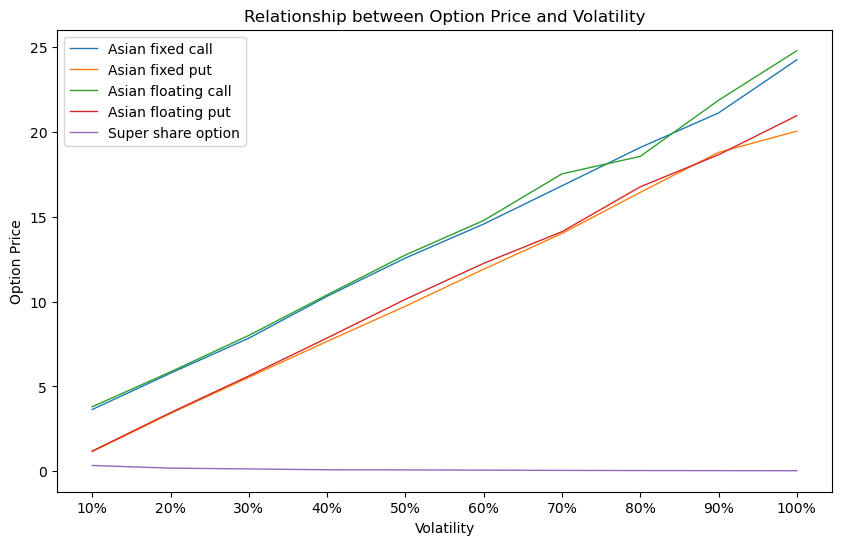

In [20]:
#create empty lists to collect the price under different volatility
asian_fixed_call_P_List=[]
asian_fixed_put_P_List=[]
asian_floating_call_P_List=[]
asian_floating_put_P_List=[]
super_share_option_P5_List=[]

#use for loop to change volatility
for i in range(1,11):
    sigma = i * 0.1
    #simulate I paths
    S = Euler_Maruyama(I)
    #calculate the average price of I simulations
    E_of_P = np.mean(S, axis=0)
    
    #calculate the payoff of Asian fixed call
    asian_fixed_call_payoff = np.maximum(E_of_P - E, 0)
    #calculate the Asian fixed call price
    asian_fixed_call_P = np.exp(-r * T) * np.mean(asian_fixed_call_payoff)
    #collect the number into the prepared list
    asian_fixed_call_P_List.append(asian_fixed_call_P)
    
    #calculate the payoff of Asian fixed put
    asian_fixed_put_payoff = np.maximum(E - E_of_P , 0)
    #calculate the Asian fixed put price
    asian_fixed_put_P = np.exp(-r * T) * np.mean(asian_fixed_put_payoff)
    #collect the number into the prepared list
    asian_fixed_put_P_List.append(asian_fixed_put_P)
    
    #calculate the payoff of Asian floating call
    asian_floating_call_payoff = np.maximum(S[-1] - E_of_P, 0)
    #calculate the Asian floating call price
    asian_floating_call_P = np.exp(-r * T) * np.mean(asian_floating_call_payoff)
    #collect the number into the prepared list
    asian_floating_call_P_List.append(asian_floating_call_P)

    #calculate the payoff of Asian floating put
    asian_floating_put_payoff = np.maximum(E_of_P - S[-1] , 0)
    #calculate the Asian floating put price
    asian_floating_put_P = np.exp(-r * T) * np.mean(asian_floating_put_payoff)
    #collect the number into the prepared list
    asian_floating_put_P_List.append(asian_floating_put_P)
    
    #calculate the payoff of Super share option 
    super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
    #calculate the Super share option price
    super_share_option_P5 = np.exp(-r * T) * np.mean(super_share_payoff)
    #collect the number into the prepared list
    super_share_option_P5_List.append(super_share_option_P5)
    
#set the graph size 
plt.figure(figsize=(10,6))

#plot the relationships between Asian fixed call prices and volatility
plt.plot(asian_fixed_call_P_List, lw=1, label='Asian fixed call')

#plot the relationships between Asian fixed put prices and volatility
plt.plot(asian_fixed_put_P_List, lw=1, label='Asian fixed put')

#plot the relationships between Asian floating call prices and volatility
plt.plot(asian_floating_call_P_List, lw=1, label='Asian floating call')

#plot the relationships between Asian floating put prices and volatility
plt.plot(asian_floating_put_P_List, lw=1, label='Asian floating put')

#plot the relationships between Super share option prices and volatility
plt.plot(super_share_option_P5_List, lw=1, label='Super share option')

#set the digits on the x-axis
plt.xticks([i for i in range(10)], [str(i*10)+"%" for i in range(1,11)])
#set the name of x-axis
plt.xlabel('Volatility')
#set the name of y-axis
plt.ylabel('Option Price')
#set the title
plt.title('Relationship between Option Price and Volatility')
# Adding a legend to the plot
plt.legend()
plt.show()    


#change volatility back
sigma = 0.2 

<b>Mini-conclusion: As volatility becomes larger, all option prices increase, except for Super share option price which decrease very slightly.</b>

<h4>(3) Time to expiry:</h4>

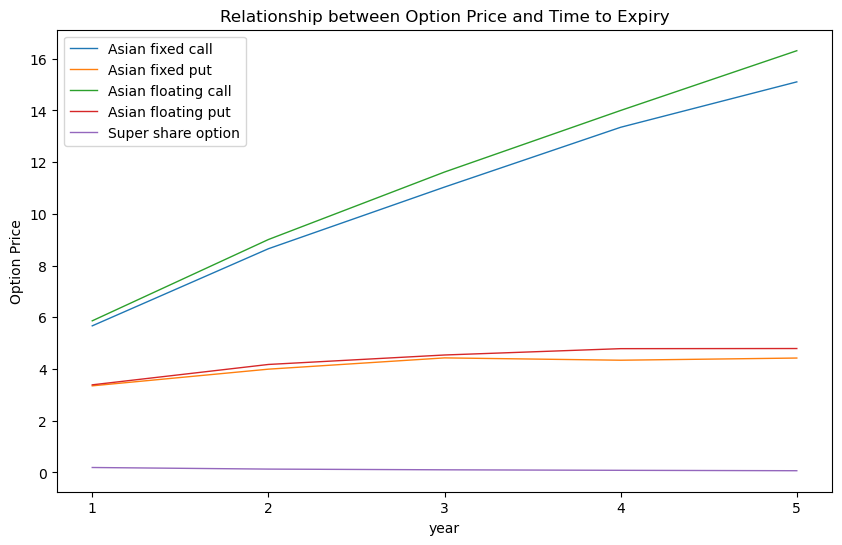

In [21]:
#create empty lists to collect the price under different time to expiry
asian_fixed_call_P_List=[]
asian_fixed_put_P_List=[]
asian_floating_call_P_List=[]
asian_floating_put_P_List=[]
super_share_option_P5_List=[]

#use for loop to change time to expiry
for i in range(1,6):
    T= i
    n=int(252*T)
    dt=T/n
    #simulate I paths
    S = Euler_Maruyama(I)
    #calculate the average price of I simulations
    E_of_P = np.mean(S, axis=0)
    
    #calculate the payoff of Asian fixed call
    asian_fixed_call_payoff = np.maximum(E_of_P - E, 0)
    #calculate the Asian fixed call price
    asian_fixed_call_P = np.exp(-r * T) * np.mean(asian_fixed_call_payoff)
    #collect the number into the prepared list
    asian_fixed_call_P_List.append(asian_fixed_call_P)
    
    #calculate the payoff of Asian fixed put
    asian_fixed_put_payoff = np.maximum(E - E_of_P , 0)
    #calculate the Asian fixed put price
    asian_fixed_put_P = np.exp(-r * T) * np.mean(asian_fixed_put_payoff)
    #collect the number into the prepared list
    asian_fixed_put_P_List.append(asian_fixed_put_P)
    
    #calculate the payoff of Asian floating call
    asian_floating_call_payoff = np.maximum(S[-1] - E_of_P, 0)
    #calculate the Asian floating call price
    asian_floating_call_P = np.exp(-r * T) * np.mean(asian_floating_call_payoff)
    #collect the number into the prepared list
    asian_floating_call_P_List.append(asian_floating_call_P)

    #calculate the payoff of Asian floating put
    asian_floating_put_payoff = np.maximum(E_of_P - S[-1] , 0)
    #calculate the Asian floating put price
    asian_floating_put_P = np.exp(-r * T) * np.mean(asian_floating_put_payoff)
    #collect the number into the prepared list
    asian_floating_put_P_List.append(asian_floating_put_P)
    
    #calculate the payoff of Super share option 
    super_share_payoff = np.where((S[-1] >= L) & (S[-1] <= U), S[-1] / L, 0)
    #calculate the Super share option price
    super_share_option_P5 = np.exp(-r * T) * np.mean(super_share_payoff)
    #collect the number into the prepared list
    super_share_option_P5_List.append(super_share_option_P5)
    
#set the graph size 
plt.figure(figsize=(10,6))

#plot the relationships between Asian fixed call prices and time to expiry
plt.plot(asian_fixed_call_P_List, lw=1, label='Asian fixed call')

#plot the relationships between Asian fixed put prices and time to expiry
plt.plot(asian_fixed_put_P_List, lw=1, label='Asian fixed put')

#plot the relationships between Asian floating call prices and time to expiry
plt.plot(asian_floating_call_P_List, lw=1, label='Asian floating call')

#plot the relationships between Asian floating put prices and time to expiry
plt.plot(asian_floating_put_P_List, lw=1, label='Asian floating put')

#plot the relationships between Super share option prices and time to expiry
plt.plot(super_share_option_P5_List, lw=1, label='Super share option')

#set the digits on the x-axis
plt.xticks([i for i in range(5)], [ i for i in range(1,6)])

#set the name of x-axis
plt.xlabel('year')
#set the name of y-axis
plt.ylabel('Option Price')
#set the title
plt.title('Relationship between Option Price and Time to Expiry')
# Adding a legend to the plot
plt.legend()
plt.show()    

#change time to expiry back
T=1

<b>Mini-conclusion: As time to expiry becomes longer, Super share option price decreases very slightly, while Asian fixed call and put prices increase. Similarly Asian floating call and put prices increase but slightly.</b>

<h2>Observations</h2>

***
1. The most efficient number of simulation is about 10000.
<br>
2. Generally, in sample condition, Asian call/put price with floating strike is higher than Asian call/put price with fixed strike, and Supershare option price is much lower than the others.
<br>
3. The relationship between option prices and parameters is shown in the follow table:
<br>
<table>
    <tr>
        <th>Parameter</th>
        <th>Asian Fixed-Strike Call</th>
        <th>Asian Fixed-Strike Put</th>
        <th>Asian Floating-Strike Call</th>
        <th>Asian Floating-Strike Put</th>
        <th>Super Share Option</th>
    </tr>
    <tr>
        <td>Strike Price ↑</td>
        <td>Price ↓</td>
        <td>Price ↑</td>
        <td>No Direct Effect</td>
        <td>No Direct Effect</td>
        <td>No Direct Effect</td>
    </tr>
    <tr>
        <td>Price Range ↑</td>
        <td>No Direct Effect</td>
        <td>No Direct Effect</td>
        <td>No Direct Effect</td>
        <td>No Direct Effect</td>
        <td>Price ↑</td>
    </tr>
    <tr>
        <td>Risk-Free Interest Rate ↑</td>
        <td>Price ↑</td>
        <td>Price ↓</td>
        <td>Price ↑</td>
        <td>Price ↓</td>
        <td>Price ↓ Slightly</td>
    </tr>
    <tr>
        <td>Volatility ↑</td>
        <td>Price ↑</td>
        <td>Price ↑</td>
        <td>Price ↑</td>
        <td>Price ↑</td>
        <td>Price ↓ Slightly</td>
    </tr>
    <tr>
        <td>Time to Expiry ↑</td>
        <td>Price ↑</td>
        <td>Price ↑</td>
        <td>Price ↑Slightly</td>
        <td>Price ↑Slightly</td>
        <td>Price ↓ Slightly</td>
    </tr>
</table>


<h2>Problems Encountered:</h2>

***

1. Monte Carlo simulation requires a large number of simulations and it is path dependent, so it requires a large amount of computational power. This is a challenge to find a balance between accuracy and efficiency.

2. Because of the random terms in Monte Carlo simulation, results are different between runs, so I set the confidence level at 99% to reduce the possiblity of getting an illogical result. To completely prevent this problem, we could also use the function np.random.seed() to fixed the random term.

<h2>Conclusion:</h2>

***

1. The result of all relationships between option prices and parameters is very reasonable and close to reality. The following statments are the real-world explaination of the option price changing as its parameters are modified.

    (1) Strike Price: for Asian Fixed-Strike Call, if the strike price is lower, it is more possible to obtain a higher payoff from the call option. In contrast, for Asian Fixed-Strike Put, if the strike price is higher, then it is more possible to obtain a higher payoff from the put option.
    
    (2) Price Range: if the price range of Super share option is larger, the final stock price is more likely to be in the price range and obtain a payoff. Moreover, a larger price range represents a lower lower bound, more likely to get a higher payoff since its payoff is equal to the final stock price divided by the lower bound.
    
    (3) Risk-Free Interest Rate: risk-free interest rate only affect the discounting and compounding factors in the simulation. As the risk-free interest rate becomes higher, for Asian Fixed-Strike and Floating-Strike Call, it represents the present value of the payoff is higher, while for Asian Fixed-Strike and Floating-Strike Put, representing the present value of the payoff is lower. And for Super Share option, it is more likely to be out the the price range if the risk-free interest rate is higher.
    
    (4) Volatility: for Asian Fixed-Strike and Floating-Strike Call and Put Options, a higher volatility represents a higher possible payoff and higher risk. Though this uncertainty increases the risk, but bring a higher potential profit. However, for Super share option, as the volatility becomes higher, it is more possible to be out of the price range, leading to a lower expectation of patoff.
    
    (5) Time to Expiry: for Asian Fixed-Strike and Floating-Strike Call and Put Options, a longer time to expiry represents a greater uncertainty, which leads to a higher possible payoff. The resaon why Asian Fixed-Strike Options are more expensive than Asian Floating-Strike Options is that the payoff of Asian Fixed-Strike Options are defined by the difference between fixed price and the average price, which has a larger uncertainty than the payoff of Asian Floating-Strike Options, the difference between the average price and the final price. Additionally, for Super share option, this uncertainty increases the likelihood that the price will be out of the price range, so the option price decreases.

2. Since the results are very similar to the real-world situation, the Euler-Maruyama scheme is an effective method to simulate stock price paths. This scheme is simple and can adapt to changes in key parameters such as volatility and time to expiry, so it is suitable for our Monte Carlo simulation approach.

<h2>Reference</h2>

***

Wilmott, P. Paul Wilmott Introduces Quantitative Finance, 2nd Ed. (2007) 

Paul Glasserman, Monte Carlo Methods in Financial Engineering  (2003)

Scientific Computing Lecture Slides: https://keats.kcl.ac.uk/pluginfile.php/9705822/mod_resource/content/9/mc-option-pricing-notes.html

Supershare Options Explained: http://www.derivativepricing.com/blogpage.asp?id=21